<a href="https://colab.research.google.com/github/AjayB08/Neural_Networks/blob/main/GD_based_on_Nueron_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Download dataset. !gdown is use to download content from google drive
!gdown 1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk

Downloading...
From: https://drive.google.com/uc?id=1dLOPwh01o3k8p_hK633ixhD1ehz6nNWk
To: /content/spiral.csv
100% 12.9k/12.9k [00:00<00:00, 46.4MB/s]


In [ ]:
#Read dataset
df = pd.read_csv("spiral.csv")
df

,x1,x2,y
0,0.000000,0.000000,0
1,-0.000650,0.010080,0
2,0.009809,0.017661,0
3,0.007487,0.029364,0
4,-0.000027,0.040404,0
...,...,...,...
295,-0.829548,0.482363,2
296,-0.753207,0.610731,2
297,-0.631949,0.748762,2
298,-0.581099,0.801389,2


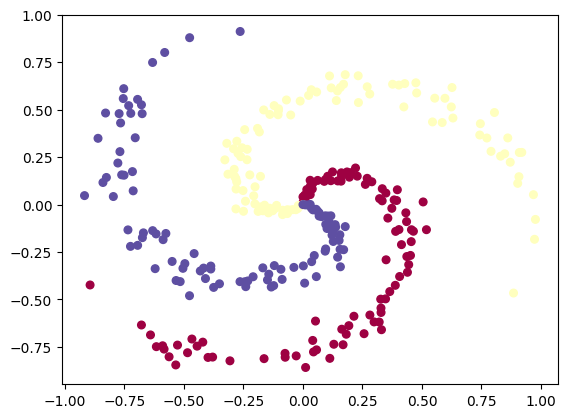

In [ ]:
# scatter plot input attributes based on y attributes
plt.scatter(df["x1"], df["x2"], c=df["y"], s=30, cmap=plt.cm.Spectral)
plt.show()

In [ ]:
#Seperating feature and lable columns
X = df.iloc[:,:-1].to_numpy()
Y = df.iloc[:,-1].to_numpy()

In [ ]:
m = X.shape[0] #Number of inputs
d = X.shape[1] #Number of features
n = len(np.unique(Y)) #Number of labels

print(m,d,n)

300 2 3


Input shape X : (300,2),
Output shape Y : (300,3),
weight shape W ?,
shape(X*W) = shape(Y),
(300x2)*W = 300x3,
So shape(W) = 2x3 (as per matrix multiplication)



In [ ]:
#Initialize parameter randomly
W = 0.01*np.random.randn(d,n)
b = np.zeros((1,n))

print("W : ", W)
print("b : ", b)

W :  [[-0.0239819   0.00466996  0.01267479]
 [-0.01234339 -0.0009748   0.00638544]]
b :  [[0. 0. 0.]]


In [ ]:
#compute scores for a linear classifier
z = np.dot(X, W) + b
print(z.shape)

(300, 3)


In [ ]:
#Compute probability matrix of scores (y_predict)
exp_z = np.exp(z)
probs = exp_z /np.sum(exp_z, axis = 1, keepdims=True)
#axis=1 represent column wise here. Since we want to get probablity for each input in terms of lables,we are doing column wise summation
print(probs)

[[0.33333333 0.33333333 0.33333333]
 [0.33330434 0.33333633 0.33335933]
 [0.3332031  0.33336369 0.33343321]
 [0.33318082 0.33336357 0.33345561]
 [0.33319842 0.33335125 0.33345033]
 [0.33311252 0.33337254 0.33351493]
 [0.33293738 0.33342636 0.33363626]
 [0.33293239 0.33341947 0.33364813]
 [0.33295242 0.33340521 0.33364237]
 [0.33277563 0.33345925 0.33376512]
 [0.33278898 0.33344638 0.33376464]
 [0.33272693 0.33346032 0.33381276]
 [0.33264723 0.33348046 0.33387231]
 [0.33268792 0.33345892 0.33385315]
 [0.33246076 0.33353092 0.33400832]
 [0.33227642 0.33359204 0.33413154]
 [0.3322126  0.33360655 0.33418085]
 [0.33206513 0.33365657 0.3342783 ]
 [0.332081   0.3336372  0.3342818 ]
 [0.33185865 0.33372232 0.33441903]
 [0.33176155 0.3337536  0.33448484]
 [0.33185883 0.33369314 0.33444803]
 [0.33165068 0.33377091 0.33457841]
 [0.33160641 0.33377543 0.33461816]
 [0.33143946 0.33384216 0.33471838]
 [0.33141835 0.33383184 0.33474981]
 [0.33130979 0.33386825 0.33482196]
 [0.33118174 0.33391977 0.33

In [ ]:
#Compute dz = Predictions - Actual
dz = probs
dz[range(m), Y] -=1 # this will create kind of one hot encoding for Y. It will substract -1 from weight prob corresponding to label

In [ ]:
X

array([[ 0.00000000e+00,  0.00000000e+00],
       [-6.50123964e-04,  1.00800667e-02],
       [ 9.80910862e-03,  1.76607760e-02],
       [ 7.48711824e-03,  2.93635268e-02],
       [-2.71404625e-05,  4.04040313e-02],
       [ 7.41008855e-03,  4.99584899e-02],
       [ 3.04241080e-02,  5.24162974e-02],
       [ 2.47420249e-02,  6.62368632e-02],
       [ 1.60027032e-02,  7.92076979e-02],
       [ 3.90523417e-02,  8.20937112e-02],
       [ 3.06936823e-02,  9.62337694e-02],
       [ 3.50026860e-02,  1.05453739e-01],
       [ 4.22335755e-02,  1.13616475e-01],
       [ 3.00727124e-02,  1.27823200e-01],
       [ 6.16721770e-02,  1.27257621e-01],
       [ 8.93717009e-02,  1.22350072e-01],
       [ 9.39668565e-02,  1.31491496e-01],
       [ 1.16995365e-01,  1.25693562e-01],
       [ 1.03999098e-01,  1.49137651e-01],
       [ 1.46054006e-01,  1.24503830e-01],
       [ 1.60002604e-01,  1.23334216e-01],
       [ 1.24135296e-01,  1.72005340e-01],
       [ 1.62101572e-01,  1.52005909e-01],
       [ 1.

In [ ]:
#Calculate change in weight dw
dw = np.dot(X.T, dz)
dw

array([[-12.3644115 , -16.24248748,  28.60689898],
       [ 26.22510249, -30.67277571,   4.44767322]])

In [ ]:
#Calculate change in bias db
db = np.sum(dz, axis=0, keepdims=True)
db

array([[ 0.08016478, -0.02201517, -0.05814961]])

In [ ]:
#update parameters, take learning rate as 0.1
lr = 0.1
W += -lr*dw
b += -lr*db

In [ ]:
print("update Weeight : ", W)
print("update bias : ", b)

update Weeight :  [[ 1.21245925  1.6289187  -2.84801511]
 [-2.63485363  3.06630277 -0.43838188]]
update bias :  [[-0.00801648  0.00220152  0.00581496]]


In [ ]:
def predict(X):
    Z = np.dot(X, W) + b
    Z_e = np.exp(Z)
    probs = Z_e/np.sum(Z_e, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [ ]:
epochs = 500
lr = 1
d = X.shape[1]
m = X.shape[0]
n = len(np.unique(Y))
w = 0.01*np.random.randn(d,n)
b = np.zeros((1,n))
loss_history = []


for i in range(epochs):
  #evaluate score for linear classifier
  z = np.dot(X, W) + b

  #Compute class probablity
  exp_z = np.exp(z)
  probs = exp_z/np.sum(exp_z, axis=1, keepdims=True)

  #Compute loss : average cross-entropy los
  error = -np.log(probs[range(m), Y])
  loss = np.sum(error)/m
  loss_history.append(loss)
  if i % 100 == 0:
    print(f"iterations : {i}, loss : {loss}")
    print(f"Training Accuracy {np.sum(predict(X) == Y)/m}")

  #Compute gradient
  dz = probs
  dz[range(m), Y] -= 1
  dz = dz/m
  dw = np.dot(X.T, dz)
  db = np.sum(dz, axis = 0, keepdims=True)

  #perform parameter update
  w += -lr*dw
  b += -lr*db

iterations : 0, loss : 0.7496020131588824
Training Accuracy 0.5066666666666667
iterations : 100, loss : 0.7492981132717018
Training Accuracy 0.5
iterations : 200, loss : 0.7492981132717019
Training Accuracy 0.5
iterations : 300, loss : 0.7492981132717018
Training Accuracy 0.5
iterations : 400, loss : 0.7492981132717019
Training Accuracy 0.5


(36855,)
(36855, 2)


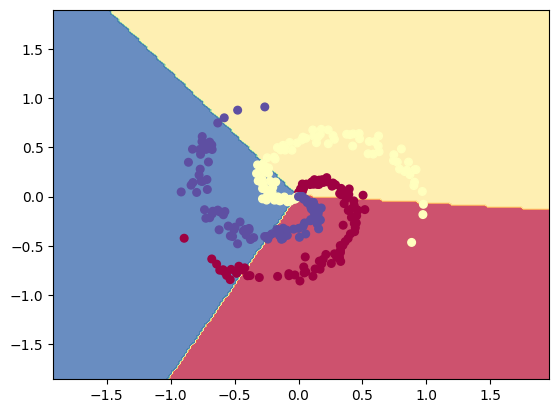

In [ ]:
#Create 2-D grid
step=0.02
x_max, x_min = X[:,0].min()-1, X[:,0].max()+1
y_max, y_min = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_max, x_min, step), np.arange(y_max, y_min, step))

print(xx.ravel().shape)
print(np.c_[xx.ravel(), yy.ravel()].shape)

# predict for all the points in the grid
y_hat = predict(np.c_[xx.ravel(), yy.ravel()])
#print(y_hat.shape, xx.shape)
y_hat = y_hat.reshape(xx.shape)
#print(y_hat.shape)

#plot
plt.figure()
plt.contourf(xx, yy, y_hat, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=Y, s=30, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()